In [28]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [29]:
df=pd.read_csv('/Users/sunilhariharan/Downloads/data science/datasets/spam.csv',encoding='latin-1')

In [30]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [31]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [32]:
df = df[["v2","v1"]].rename(columns={"v2":"sms", "v1":"class"})

In [33]:
df["class"] = df["class"].apply(lambda x: 0 if x == "ham" else 1)

In [34]:
df

,sms,class
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
5,FreeMsg Hey there darling it's been 3 week's n...,1
6,Even my brother is not like to speak with me. ...,0
7,As per your request 'Melle Melle (Oru Minnamin...,0
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1


In [15]:
X = df["sms"]
y = df["class"]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
def vectorizer(type):
  if type == "count_vectorizer":
    vect = count_vect
  if type == "tfidf":
    vect = tf_vect
  return vect

In [23]:
df

,sms,class
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
5,FreeMsg Hey there darling it's been 3 week's n...,1
6,Even my brother is not like to speak with me. ...,0
7,As per your request 'Melle Melle (Oru Minnamin...,0
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1


In [35]:
df['word_count'] = df['sms'].apply(lambda x: len(str(x).split(" ")))
df[['sms','word_count']].head()

,sms,word_count
0,"Go until jurong point, crazy.. Available only ...",20
1,Ok lar... Joking wif u oni...,6
2,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,U dun say so early hor... U c already then say...,11
4,"Nah I don't think he goes to usf, he lives aro...",13


In [36]:
df

,sms,class,word_count
0,"Go until jurong point, crazy.. Available only ...",0,20
1,Ok lar... Joking wif u oni...,0,6
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,28
3,U dun say so early hor... U c already then say...,0,11
4,"Nah I don't think he goes to usf, he lives aro...",0,13
5,FreeMsg Hey there darling it's been 3 week's n...,1,32
6,Even my brother is not like to speak with me. ...,0,16
7,As per your request 'Melle Melle (Oru Minnamin...,0,26
8,WINNER!! As a valued network customer you have...,1,26
9,Had your mobile 11 months or more? U R entitle...,1,29


In [38]:
df['char_count'] = df['sms'].str.len() ## this also includes spaces
df[['sms','char_count','class']].head()

,sms,char_count,class
0,"Go until jurong point, crazy.. Available only ...",111,0
1,Ok lar... Joking wif u oni...,29,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,U dun say so early hor... U c already then say...,49,0
4,"Nah I don't think he goes to usf, he lives aro...",61,0


In [40]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['sms'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['sms','stopwords','class']].head()

,sms,stopwords,class
0,"Go until jurong point, crazy.. Available only ...",4,0
1,Ok lar... Joking wif u oni...,0,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,5,1
3,U dun say so early hor... U c already then say...,2,0
4,"Nah I don't think he goes to usf, he lives aro...",5,0


In [ ]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

train['avg_word'] = train['tweet'].apply(lambda x: avg_word(x))
train[['tweet','avg_word']].head()

In [41]:
df.groupby('class').get_group(1)

,sms,class,word_count,char_count,stopwords
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,28,155,5
5,FreeMsg Hey there darling it's been 3 week's n...,1,32,148,13
8,WINNER!! As a valued network customer you have...,1,26,158,5
9,Had your mobile 11 months or more? U R entitle...,1,29,154,8
11,"SIX chances to win CASH! From 100 to 20,000 po...",1,26,136,4
12,URGENT! You have won a 1 week FREE membership ...,1,26,156,7
15,"XXXMobileMovieClub: To use your credit, click ...",1,19,149,5
19,England v Macedonia - dont miss the goals/team...,1,24,156,3
34,Thanks for your subscription to Ringtone UK yo...,1,29,159,13
42,07732584351 - Rodger Burns - MSG = We tried to...,1,33,172,10


In [44]:
l=list(df['sms'])

In [45]:
import nltk

In [61]:
words=[]
for i in l:
    words += nltk.word_tokenize(i)
    
w=[i.lower() for i in words if i not in stop_words]

In [47]:
words

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat',
 '...',
 'Ok',
 'lar',
 '...',
 'Joking',
 'wif',
 'u',
 'oni',
 '...',
 'Free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'FA',
 'Cup',
 'final',
 'tkts',
 '21st',
 'May',
 '2005',
 '.',
 'Text',
 'FA',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'question',
 '(',
 'std',
 'txt',
 'rate',
 ')',
 'T',
 '&',
 'C',
 "'s",
 'apply',
 '08452810075over18',
 "'s",
 'U',
 'dun',
 'say',
 'so',
 'early',
 'hor',
 '...',
 'U',
 'c',
 'already',
 'then',
 'say',
 '...',
 'Nah',
 'I',
 'do',
 "n't",
 'think',
 'he',
 'goes',
 'to',
 'usf',
 ',',
 'he',
 'lives',
 'around',
 'here',
 'though',
 'FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',


In [62]:
s=pd.Series(w)

In [63]:
s.value_counts()

.                                            4920
i                                            1952
,                                            1871
?                                            1541
!                                            1381
...                                          1233
u                                            1118
&                                             916
;                                             764
:                                             717
call                                          576
)                                             494
's                                            492
2                                             485
'm                                            395
get                                           385
ur                                            381
n't                                           361
you                                           340
gt                                            318


In [60]:
stop_words=set(stopwords.words('english'))

In [64]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [65]:
df['word_count'].mean()

15.60678391959799

In [66]:
df['char_count'].mean()

80.11880832735105

In [67]:
from altair import *
import pandas as pd


Chart(df).mark_point().encode(x='word_count',y='char_count', color='species')

ModuleNotFoundError: No module named 'altair'

In [68]:
df

,sms,class,word_count,char_count,stopwords
0,"Go until jurong point, crazy.. Available only ...",0,20,111,4
1,Ok lar... Joking wif u oni...,0,6,29,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,28,155,5
3,U dun say so early hor... U c already then say...,0,11,49,2
4,"Nah I don't think he goes to usf, he lives aro...",0,13,61,5
5,FreeMsg Hey there darling it's been 3 week's n...,1,32,148,13
6,Even my brother is not like to speak with me. ...,0,16,77,6
7,As per your request 'Melle Melle (Oru Minnamin...,0,26,160,9
8,WINNER!! As a valued network customer you have...,1,26,158,5
9,Had your mobile 11 months or more? U R entitle...,1,29,154,8


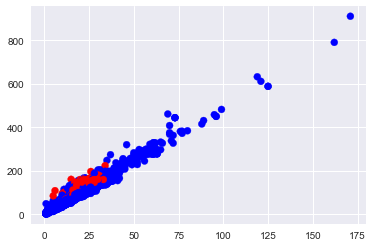

In [72]:
import matplotlib.pyplot as plt
import pandas as pd





fig, ax = plt.subplots()

colors = {1:'red', 0:'blue'}

ax.scatter(df['word_count'], df['char_count'], c=df['class'].apply(lambda x: colors[x]))

plt.show()

In [75]:
df1=df.groupby('class').get_group(0)

In [76]:
df1['word_count'].mean()

14.323937823834196